> Dane jest $ n $ punktów na osi liczbowej jednowymiarowej. Napisz algorytm, który stwierdzi, w którym z nich należy wybudować dom, tak, aby suma euklidesowych odległości od tego punktu do wszystkich pozostałych była minimalna. Należy zwrócić również tę sumę. Algorytm powinien być jak najszybszy.

### Omówienie algorytmu

Ponieważ suma odległości ma być jak najmniejsza, pierwsze, co przychodzi namyśl, to wyznaczenie mediany. Poniżej wyjaśnienie, dlaczego jest to najlepszy wybór.

##### Wyjaśnienie, dlaczego mediana

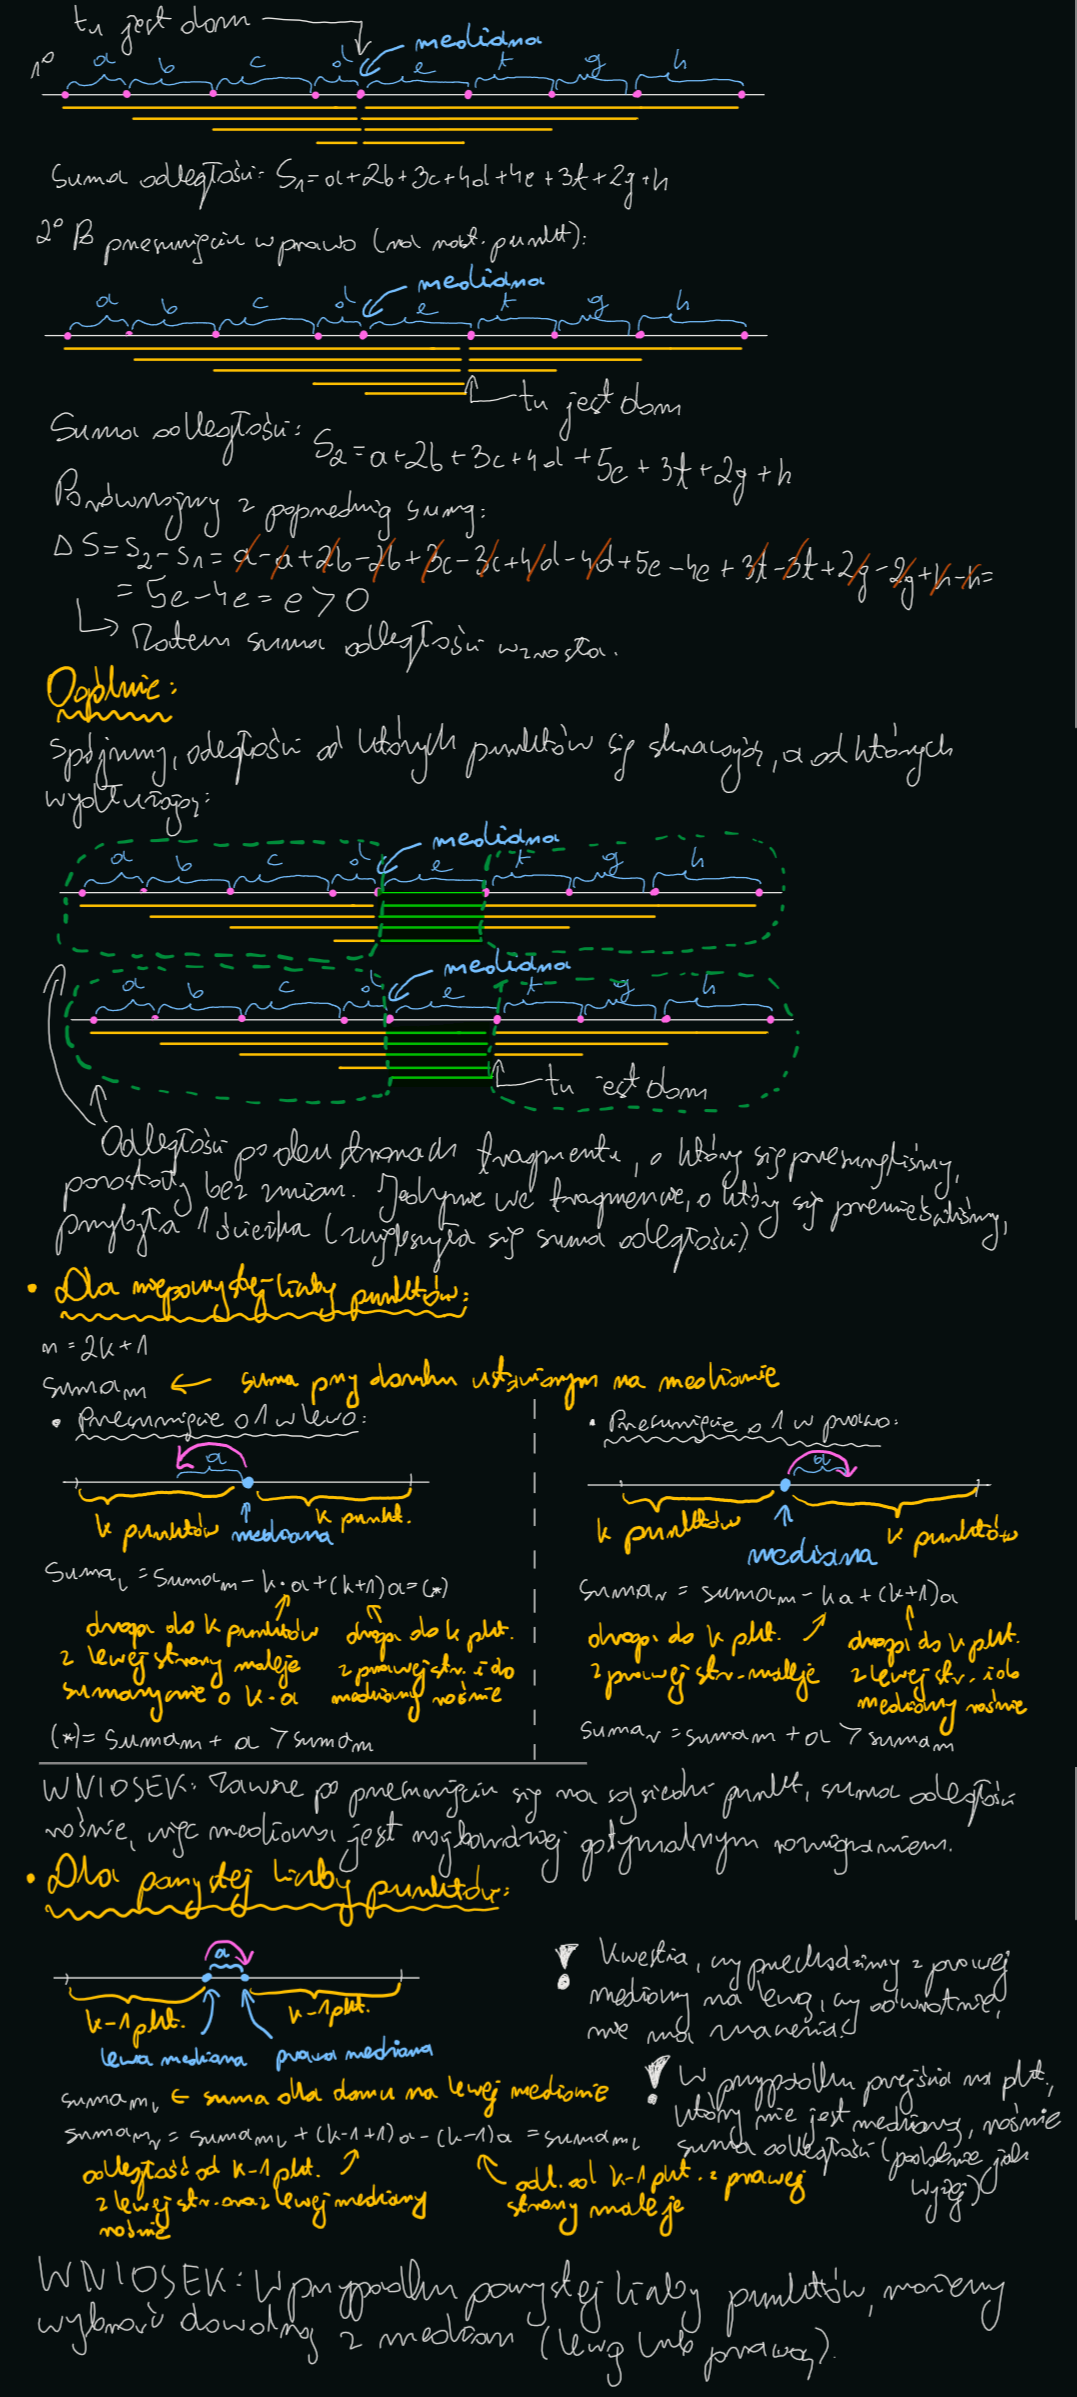

##### Omówienie planu działania

Ponieważ algorytm ma być jak najszybszy, mediany nie będziemy wyznaczać jako środka posortowanej tablicy. Liczby, które reprezentują punkty na osi liczbowej, nie są posortowane (nie wiemy nic na ich temat), dlatego najlepiej wykorzystać algorytm szybkiego wybierania, w celu wyznaczenia mediany w czasie liniowym. Natępnie, dla wyznaczonej mediany, wystarczy przejść liniowo po tablicy współrzędnych i obliczać odległość mediany od kolejnych punktów, a następnie dodawać tę wartość do sumy wszystkich odległości. Na koniec wystarczy zwrócić wyznaczony punkt (najlepiej wartość współrzędnej) oraz obliczoną sumę.

### Implementacja algorytmu #1
#### (Z użyciem algorytmu Magicznych Piątek do wyznaczenia pivota)

In [1]:
def place_house(arr):
    if not arr: return None, None
    # Find a median of values in an array
    # Take the upper median when there is even number of points
    # in an array
    median = median_select(arr, 1)
    # Calculate a sum of distances from all the points
    sum_dist = 0
    for point in arr:
        sum_dist += abs(point - median)
    # Return a median and a sum of distances
    return median, sum_dist


def median_select(arr: list, _even_arr_case=0):
    if not arr: return None
    if len(arr) == 1: return arr[0]
    
    mid_idx = len(arr) // 2
    # If an array has odd number of elements, select the middle value
    if len(arr) % 2: return linear_select(arr, mid_idx)
    # If a number of array values is even and _even_arr_case is set to
    # 0, return an average of two elements selected on the indices 
    # surrounding the middle of an array
    if _even_arr_case == 0:
        res = (linear_select(arr, mid_idx) + linear_select(arr, mid_idx - 1)) / 2
        return int(res) if int(res) == res else res
    # Return the left median
    if _even_arr_case == -1: return linear_select(arr, mid_idx - 1)
    # Return the left right
    if _even_arr_case == 1: return linear_select(arr, mid_idx)    
    # If _even_arr_case has not a valid value, raise an exception
    raise ValueError(f'Wrong value of _even_arr_case. Expected -1, 0 or 1, got {_even_arr_case}')
    

def linear_select(arr: list, k: 'index of element'):
    # Prepare variables which indicate the bounds of the subarray searched
    left_idx = 0
    right_idx = len(arr) - 1

    # Loop till the subarray is not empty
    while left_idx <= right_idx:
        # Calculate a median of medians and store this value on the left_idx
        median_of_medians(arr, left_idx, right_idx)
        # Partition the current subarray using a median calculated above
        # as a pivot value
        pivot_idx = _partition(arr, left_idx, right_idx)

        # If a pivot was placed before the index desired, we have to look for
        # a desired value in the right part of the current subarray
        if pivot_idx < k:
            left_idx = pivot_idx + 1
        # If a pivot was placed after the index desired, we have to search
        # for a value in the left part of the current subarray
        elif pivot_idx > k:
            right_idx = pivot_idx - 1
        # Otherwise, (if k == pivot_idx) return a value which was searched
        else:
            return arr[k]


def median_of_medians(arr: list, left_idx: int, right_idx: int, k: int = 5) -> 'median of medians':
    # Store the position on which the next median will be stored
    # (we will store each median of current k-element subarrays one
    # after another at the beginning of the subarray which begins
    # on the left_index and ends on the right_idx (inclusive)
    next_swap_idx = left_idx

    # Loop till the current subarray has more than k elements
    while right_idx - left_idx >= k:
        # Calculate and store a median of each full k-element subarray
        for end_idx in range(left_idx + k-1, right_idx + 1, k):
            # Store a median on the next index just after the last median stored
            # (swap a median with a value placed after previously calculated medians)
            _swap(arr, next_swap_idx, _select_median(arr, end_idx - k + 1, end_idx))
            next_swap_idx += 1

        # Calculate and store a median of the remaining subarray
        # (which has less than k elements)
        if end_idx < right_idx - 1:
            _swap(arr, next_swap_idx, _select_median(arr, end_idx, right_idx))
            next_swap_idx += 1

        # Prepare variables for the next loop (we will calculate a median of
        # the subarray of medians calculated above, so the right_idx will now
        # be equal to the index of the last median previously determined)
        right_idx = next_swap_idx - 1
        next_swap_idx = left_idx

    # Finally, swap a median of the subarray of medians (which has no more than
    # k elements) with the first (leftmost) value of the subarray
    _swap(arr, left_idx, _select_median(arr, left_idx, right_idx))
    # Return a value of a median
    return arr[left_idx]


def _select_median(arr: list, left_idx: int, right_idx: int) -> int:
    # Using the Selection Sort concept, sort only elements of the
    # subarray which are placed up to the middle index (including
    # the middle element)
    mid_idx = (right_idx + left_idx) // 2
    for i in range(left_idx, mid_idx + 1):
        min_idx = i
        for j in range(i + 1, right_idx + 1):
            if arr[j] < arr[min_idx]:
                min_idx = j
        _swap(arr, min_idx, i)
    # Return the middle index which is a position of the median
    # after sorting a part of the subarray
    return mid_idx


def _swap(arr: list, i: int, j: int):
    arr[i], arr[j] = arr[j], arr[i]


def _partition(arr: list, left_idx: int, right_idx: int) -> int:
    # After running the median of medians function a pivot (this median of medians)
    # will be placed on the left_idx of the subarray
    pivot = arr[left_idx]

    # Partition an array into 2 subarrays: the first one of elements lower than
    # a pivot and the second one of elements greater than or equal to a pivot
    i = left_idx + 1
    for j in range(left_idx, right_idx + 1):
        if arr[j] < pivot:
            _swap(arr, i, j)
            i += 1

    # Place a pivot element on its destination index
    _swap(arr, i - 1, left_idx)

    return i - 1  # Return a pivot position after the last swap

###### Kilka testów

In [2]:
import random

# Można sprawdzić, czy suma jest taka sama dla górnej i dolnej mediany, zmieniając
# wartość parametru funkcji median_select (nawet dla mediany, będącej średnią mediany
# dolnej i górnej, otrzymujemy tę samą sumę odległości)
random.seed(0)

points = [round(random.randint(-100, 100) * random.random(), 2) for _ in range(random.randint(0, 20))]
print('Input:', points)
sorted_points = sorted(points)
print('Sorted:', sorted_points)
median, sum_ = place_house(points)
print('Expected median:', sorted_points[len(points) // 2] if points else None)
print('Median:', median, 'Sum dist:', sum_)
# W przypadku liczb zmiennoprzecinkowych, suma jest obarczona błędem, wynikającym ze
# sposobu przechowywania liczb zmiennoprzecinkowych w komputerze.

Input: [83.68, -23.3, 14.58, 82.99, 7.88, -22.71, -3.91, -47.0, -35.54, 35.38, 48.72, -2.07]
Sorted: [-47.0, -35.54, -23.3, -22.71, -3.91, -2.07, 7.88, 14.58, 35.38, 48.72, 82.99, 83.68]
Expected median: 7.88
Median: 7.88 Sum dist: 407.76


### Implementacja algorytmu #2
#### (Z użyciem zwykłego Quick Selecta)

In [3]:
def place_house(arr):
    if not arr: return None, None
    # Find a median of values in an array
    median = median_select(arr)
    # Calculate a sum of distances from all the points
    sum_dist = 0
    for point in arr:
        sum_dist += abs(point - median)
    # Return a median and a sum of distances
    return median, sum_dist


def median_select(arr):
    # Take the upper median when there is even number of points
    # in an array
    return quick_select(arr, len(arr) // 2)


def quick_select(arr, k: 'index of a value'):
    return _quick_select(arr, k, 0, len(arr)-1)
    
    
def _quick_select(arr, k, left_idx, right_idx):
    pivot_position = _partition(arr, left_idx, right_idx)
    
    if pivot_position > k:
        return _quick_select(arr, k, left_idx, pivot_position - 1)
    elif pivot_position < k:
        return _quick_select(arr, k, pivot_position + 1, right_idx)
    else:
        return arr[pivot_position]
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[right_idx]
    
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater than a pivot
    i = left_idx
    for j in range(left_idx, right_idx):
        if arr[j] < pivot:
            swap(arr, i, j)
            i += 1
    
    # Place a pivot element on its destination index
    swap(arr, i, right_idx)
    
    return i  # Return a pivot position after the last swap

    
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [4]:
import random

# random.seed(0)

points = [round(random.randint(-100, 100) * random.random(), 2) for _ in range(random.randint(0, 20))]
print('Input:', points)
sorted_points = sorted(points)
print('Sorted:', sorted_points)
median, sum_ = place_house(points)
print('Expected median:', sorted_points[len(points) // 2] if points else None)
print('Median:', median, 'Sum dist:', sum_)
# W przypadku liczb zmiennoprzecinkowych, suma jest obarczona błędem, wynikającym ze
# sposobu przechowywania liczb zmiennoprzecinkowych w komputerze.

Input: [24.76, 4.33]
Sorted: [4.33, 24.76]
Expected median: 24.76
Median: 24.76 Sum dist: 20.43
